In [1]:
import json 
import matplotlib.pyplot as plt

In [2]:
with open('../data/jump_analysis/long_dist_100_selected_jump.json', 'r') as file:
    jump_bi= json.load(file)
    
with open('../data/jump_analysis/long_dist_100_selected_jump_left.json', 'r') as file:
    jump_left = json.load(file)

with open('../data/jump_analysis/long_dist_100_selected_jump_right.json', 'r') as file:
    jump_right = json.load(file) 

In [3]:
started_high = 0

In [4]:
len(jump_right)

68

In [5]:
def find_max_index(entry, d2, d3):
    protein_name = entry['protein_name']
    position = entry['position']
    
    match_d2 = next((item for item in d2 if item['protein_name'] == protein_name and item['position'] == position), None)
    match_d3 = next((item for item in d3 if item['protein_name'] == protein_name and item['position'] == position), None)
    
    if match_d2 and match_d3:
        return min(match_d2['max_index'], match_d3['max_index'])
    elif match_d2:
        return match_d2['max_index']
    elif match_d3:
        return match_d3['max_index']
    else:
        return entry['max_index']

In [6]:
min_seg = []
for entry in jump_bi: 
    
    min_fl_oneside = find_max_index(entry, jump_left, jump_right)
    fl_otherside = entry['max_index'] 
    total_len = 11 *2 + (min_fl_oneside + 1) + (fl_otherside + 1) 
    min_seg.append(total_len)
    

In [7]:
len([2 * (item['max_index'] + 1 + 11) for item in jump_bi])

103

In [8]:
sym_min_seg = [2 * (item['max_index'] + 1 + 11) for item in jump_bi]
sym_min_seg = sym_min_seg + [22] * started_high

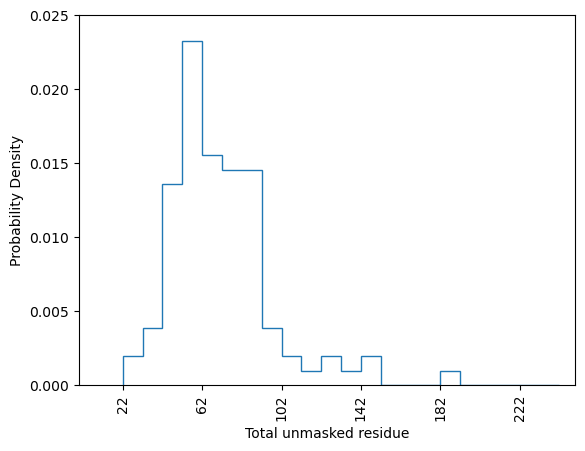

In [9]:
plt.hist(sym_min_seg, bins=22, range=(22,242), density = True, histtype='step', label = 'both side')
plt.xticks(list(range(22,250,40)),list(range(22,250,40)),rotation=90)
plt.xlabel('Total unmasked residue')
plt.ylabel('Probability Density')
plt.xlim(0, 250) 
plt.ylim(0, 0.025) 
plt.savefig('../figures_manuscript/revision/long_dist_100_minseg_jump_sym.svg')
plt.show()

In [10]:
def find_90th_percentile(numbers):
    sorted_numbers = sorted(numbers)
    index_90th = int(0.9 * (len(sorted_numbers) - 1))
    percentile_90th = sorted_numbers[index_90th]
    
    return percentile_90th

In [11]:
min_seg = min_seg + [22] * started_high 

In [12]:
find_90th_percentile(min_seg)

91

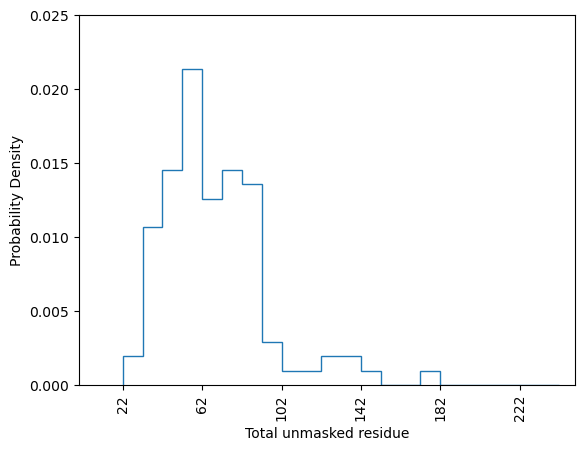

In [13]:
#plt.hist(min_seg, bins=20, range=(15,250), density = True, histtype='step', label  = 'one side')
#plt.xticks(list(range(15,250,15)),list(range(15,250,15)),rotation=90)

plt.hist(min_seg, bins=22, range=(22,242), density = True, histtype='step', label  = 'one side')
plt.xticks(list(range(22,250,40)),list(range(22,250,40)),rotation=90)
plt.xlabel('Total unmasked residue')
plt.ylabel('Probability Density')
plt.xlim(0, 250) 
plt.ylim(0, 0.025) 
plt.savefig('../figures_manuscript/revision/long_dist_100_minseg_jump_asym.svg')
plt.show()